<a href="https://colab.research.google.com/github/lovnishverma/Python-Getting-Started/blob/main/Unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K-Means Clustering Example**

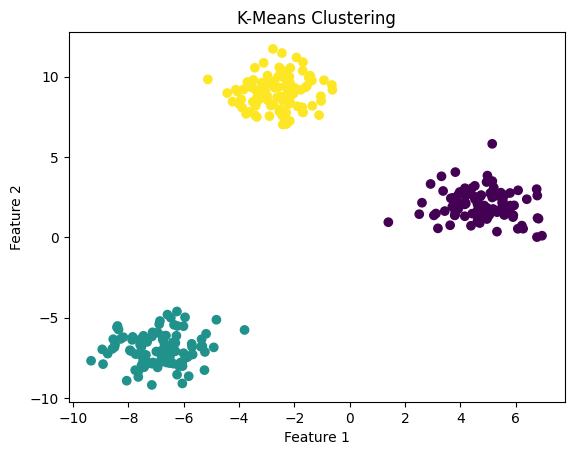

In [ ]:
# K-Means Clustering - Full Working Code

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate synthetic dataset
X, _ = make_blobs(n_samples=300, centers=3, random_state=42)

# Build K-Means model
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
labels = kmeans.labels_

# Plot result
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

**Elbow Method to Find Optimal K**

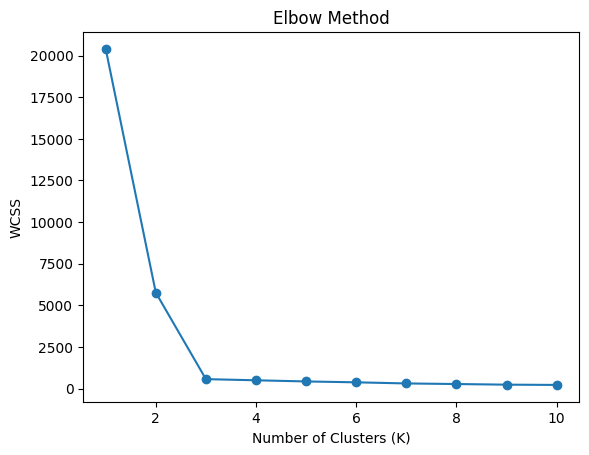

In [ ]:
# Elbow Method to find optimal K

wcss = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    wcss.append(km.inertia_)  # Within cluster sum of squares

plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.show()

**Hierarchical Clustering (Agglomerative)**

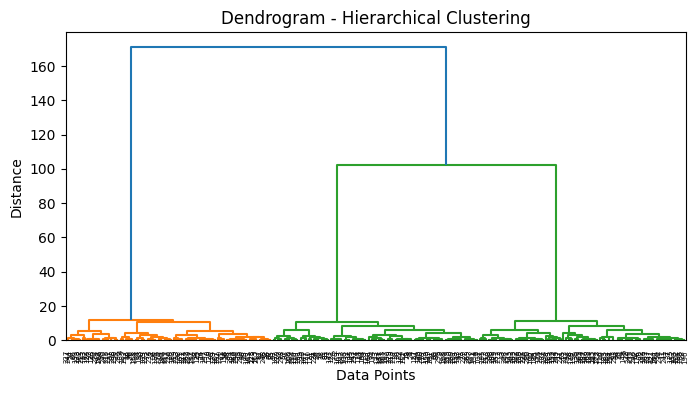

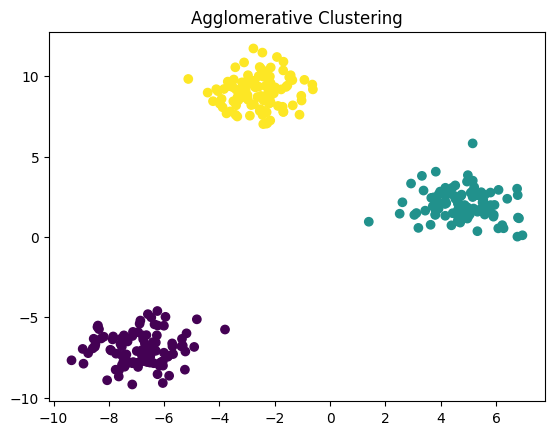

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

# Plot Dendrogram
plt.figure(figsize=(8, 4))
shc.dendrogram(shc.linkage(X, method='ward'))
plt.title("Dendrogram - Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

# Fit Agglomerative model
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
labels = hc.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("Agglomerative Clustering")
plt.show()

**Comparison Table**

| Feature           | Hierarchical               | K-Means                   |
| ----------------- | -------------------------- | ------------------------- |
| Need K initially  | No                         | Yes                       |
| Output            | Dendrogram                 | Cluster labels            |
| Speed             | Slower                     | Faster                    |
| Best for          | Small/medium datasets      | Large datasets            |
| Method            | Merging/Splitting clusters | Centroid optimization     |
| Shape of clusters | Any shape                  | Mostly spherical clusters |


**Summary**

| Key Point                                                        |
| ---------------------------------------------------------------- |
| Unsupervised learning finds hidden patterns without labels       |
| Clustering groups similar data items                             |
| Hierarchical: Agglomerative (bottom-up), Divisive (top-down)     |
| K-Means: Most common partitional clustering                      |
| Elbow method finds optimal K                                     |
| Used widely in marketing, fraud detection, healthcare, NLP, etc. |


# Clustering with Real-World Examples

**Example: Customer Annual Income vs Spending Score**

*(Like data used in malls & retail analytics)*

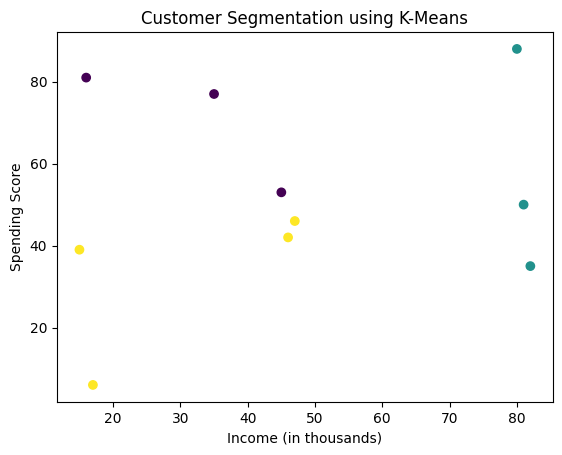

In [ ]:
# K-Means Customer Segmentation Example

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Sample customer dataset
data = {
    'Income': [15, 16, 17, 35, 45, 46, 47, 80, 81, 82],
    'SpendingScore': [39, 81, 6, 77, 53, 42, 46, 88, 50, 35]
}

df = pd.DataFrame(data)

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Income', 'SpendingScore']])

# Plot clusters
plt.scatter(df['Income'], df['SpendingScore'], c=df['Cluster'])
plt.xlabel("Income (in thousands)")
plt.ylabel("Spending Score")
plt.title("Customer Segmentation using K-Means")
plt.show()

**Elbow Method (Find Best K)**

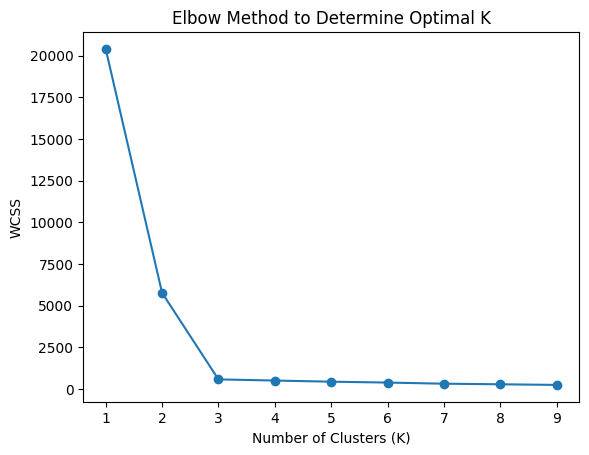

In [ ]:
# Elbow Method (to find best K)
wcss = []
for k in range(1, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    wcss.append(km.inertia_)

plt.plot(range(1, 10), wcss, marker='o')
plt.title("Elbow Method to Determine Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.show()

Between:

K=1 → K=2 (big improvement)

K=2 → K=3 (big improvement)

K=3 → K=4 (small improvement)

After K=4, improvement is very small

**So best K ≈ 3**

In [ ]:
from sklearn.metrics import silhouette_score

for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    score = silhouette_score(X, km.labels_)
    print(k, score)

2 0.7049437310743717
3 0.8480303059596955
4 0.6764211610337508
5 0.49631564306271647
6 0.5170399982662364
7 0.358030586983425
8 0.3625632360122803
9 0.37134027555333055




---



**Full Code: Train → Save → Load → Predict**

# K-Means Customer Segmentation Example with Save & Load Model

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import joblib   # for saving and loading a model

# Sample customer dataset

In [ ]:
data = {
    'Income': [15, 16, 17, 35, 45, 46, 47, 80, 81, 82],
    'SpendingScore': [39, 81, 6, 77, 53, 42, 46, 88, 50, 35]
}

df = pd.DataFrame(data)

In [ ]:
# Prepare features
X = df[['Income', 'SpendingScore']]

# Train Model

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Save Model

In [ ]:
joblib.dump(kmeans, "customer_kmeans_model.pkl")
print("Model saved successfully!")

Model saved successfully!


# Load Model

In [ ]:
loaded_model = joblib.load("customer_kmeans_model.pkl")
print("Model loaded successfully!")

Model loaded successfully!


# Predict using Loaded Model

In [ ]:
# Example: Predict cluster for new customer samples
new_customers = pd.DataFrame({
    'Income': [20, 50, 90],
    'SpendingScore': [70, 40, 20]
})

predicted_clusters = loaded_model.predict(new_customers)
print("\nPrediction Results:")
print(pd.concat([new_customers, pd.DataFrame(predicted_clusters, columns=['PredictedCluster'])], axis=1))


Prediction Results:
   Income  SpendingScore  PredictedCluster
0      20             70                 0
1      50             40                 2
2      90             20                 1


# Plot Clusters

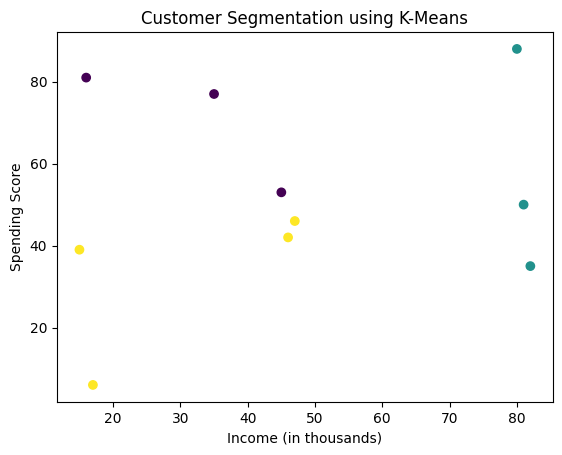

In [ ]:
plt.scatter(df['Income'], df['SpendingScore'], c=df['Cluster'])
plt.xlabel("Income (in thousands)")
plt.ylabel("Spending Score")
plt.title("Customer Segmentation using K-Means")
plt.show()

Your model groups customers based on **similarity** in:

* Income
* Spending Score

So the model learns cluster patterns, such as:

| Cluster | Customer Type (Example Interpretation) |
| ------- | -------------------------------------- |
| 0       | Low Income – Medium/High Spending      |
| 1       | Medium Income – Balanced Spending      |
| 2       | High Income – Low/Medium Spending      |


> "We are not predicting a numeric value. We are discovering **hidden groups** of customers. K-Means helps us label customers into segments automatically."

---

